In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import pandas as pd
import h5py

bright = [(68,119,170), (102,204,238), (34, 136, 51), (204,187,68), (238,102,119), (170,51,119), (187,187,187)]    
for i in range(len(bright)):    
    r, g, b = bright[i]    
    bright[i] = (r / 255., g / 255., b / 255.)     
highc = [(255,255,255), (221,170,51), (187, 85, 102), (0,68,136), (0,0,0)]    
for i in range(len(highc)):    
    r, g, b = highc[i]    
    highc[i] = (r / 255., g / 255., b / 255.)    
vibrant =  [(0,119,187), (51,187,238), (0, 153, 136), (238,119,51), (204,51,17), (238,51,119), (187,187,187)]   
for i in range(len(vibrant)):    
    r, g, b = vibrant[i]    
    vibrant[i] = (r / 255., g / 255., b / 255.)    
muted =  [(51,34,136), (136,204,238), (68, 170, 153), (17,119,51), (153,153,51), (221,204,119), (204,102,119), (136,34,85), (170, 68, 153), (221,221,221)]  
for i in range(len(muted)):    
    r, g, b = muted[i]    
    muted[i] = (r / 255., g / 255., b / 255.)    
light = [(119,170,221), (153, 221, 255), (68,187,153), (187,204,51), (170,170,0), (238,221,136), (238,136,102), (255,170,187),(221,221,221)]
for i in range(len(light)):    
    r, g, b = light[i]    
    light[i] = (r / 255., g / 255., b / 255.)   
basic =[(0,119,187),(17,119,51),(204,51,17),(85,85,85)]    
for i in range(len(basic)):    
    r, g, b = basic[i]    
    basic[i] = (r / 255., g / 255., b / 255.)
greys = [(255./4. * 3., 255./4.*3., 255./4.*3.), (255./4. * 2., 255./4.*2., 255./4.*2. ), (255./4., 255./4., 255./4. )]
for i in range(len(greys)):    
    r, g, b = greys[i]    
    greys[i] = (r / 255., g / 255., b / 255.)

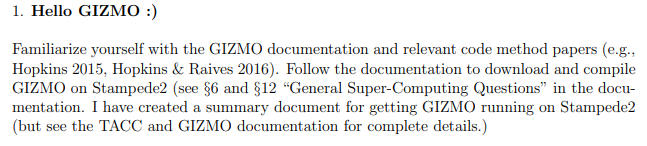

Done! Thank you, the installation guide you wrote was very easy to follow and clear. 

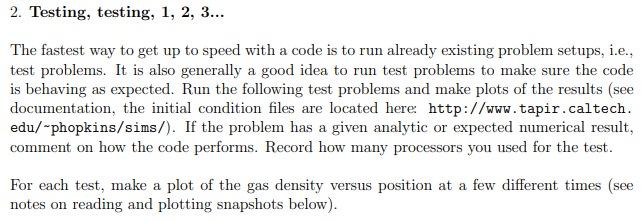

For each test, I ran on only 1 core, as the tests seemed to run relatively quick.

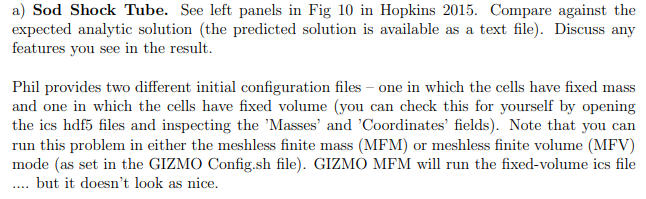

In [4]:
#I will be running the MFM. First, we load in the analytical solution.
shock_exact = pd.read_csv('shocktube_exact.txt',delimiter='\s+',header=None,index_col=False,
                          names=["x","density","pressure","entropy","x_velocity"])
exact_x = shock_exact["x"]
exact_rho = shock_exact["density"]
#Next we load in a few snapshots from the GIZMO output
s0,s1,s5,s10 = "shockdata/snapshot_000.hdf5", "shockdata/snapshot_001.hdf5","shockdata/snapshot_005.hdf5", "shockdata/snapshot_010.hdf5"
shock0,shock1,shock5,shock10 = h5py.File(s0,'r'), h5py.File(s1,'r'), h5py.File(s5,'r'), h5py.File(s10,'r')

In [5]:
#First, I grab arrays for the positional coordinates. For this 1D example, we only have the x-coords
s0_x = shock0["PartType0"]["Coordinates"][:,0]
s1_x = shock1["PartType0"]["Coordinates"][:,0]
s5_x = shock5["PartType0"]["Coordinates"][:,0]
s10_x = shock10["PartType0"]["Coordinates"][:,0]
#Next we grab the densities
s0_rho = shock0["PartType0"]["Density"][:]
s1_rho = shock1["PartType0"]["Density"][:]
s5_rho = shock5["PartType0"]["Density"][:]
s10_rho = shock10["PartType0"]["Density"][:]

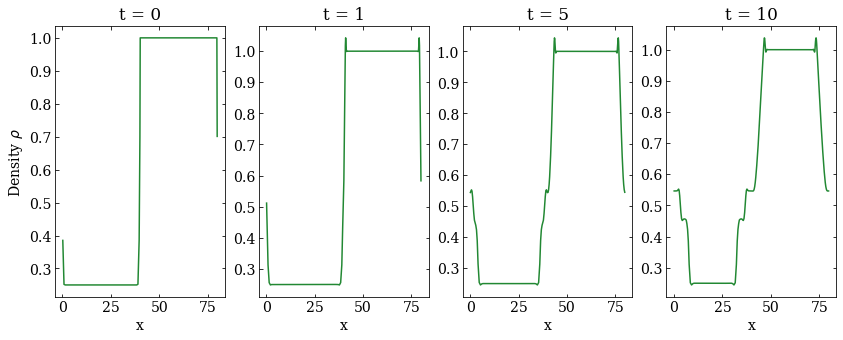

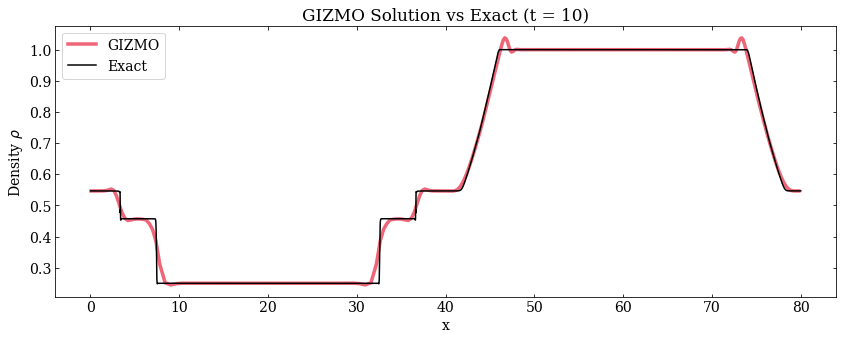

In [8]:
#Plotting time
plt.rc('font', family='serif',size=14);
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(14, 5));
ax1.plot(s0_x,s0_rho,color=bright[2],label='t=0');
ax1.set_title('t = 0');
ax1.set_ylabel(r'Density $\rho$');
ax1.set_xlabel('x');
ax1.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax2.plot(s1_x,s1_rho,color=bright[2],label='t=1');
ax2.set_title('t = 1');
ax2.set_xlabel('x');
ax2.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax3.plot(s5_x,s5_rho,color=bright[2],label='t=5');
ax3.set_title('t = 5');
ax3.set_xlabel('x');
ax3.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax4.plot(s10_x,s10_rho,color=bright[2],label='t=10');
ax4.set_title('t = 10');
ax4.set_xlabel('x');
ax4.tick_params(which='both',axis='both',direction='in',top=True,right=True)
fig, (ax1)=plt.subplots(1,1,figsize=(14, 5));
ax1.plot(s10_x,s10_rho,color=bright[4],label='GIZMO',linewidth=3.5);
ax1.plot(exact_x,exact_rho,color='k',label='Exact');
ax1.set_title('GIZMO Solution vs Exact (t = 10)');
ax1.set_ylabel(r'Density $\rho$');
ax1.set_xlabel('x');
ax1.legend(loc="upper left")
ax1.tick_params(which='both',axis='both',direction='in',top=True,right=True)

We see that it does an OK job, but there are some very noticeable artificts in the solution. This could be for a number of reasons, but a guess could be the time step, from what we observed in homework 2. I made sure I was using the fixed mass initial conditions file, so it wasn't that. The way that is seems to smooth the discontinuity betwen the shocks maybe says something about how the Riemann solver is operating? It could be that our grid size isn't large enough, as we only have about 80 cells in this shock tube.

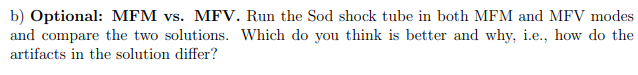

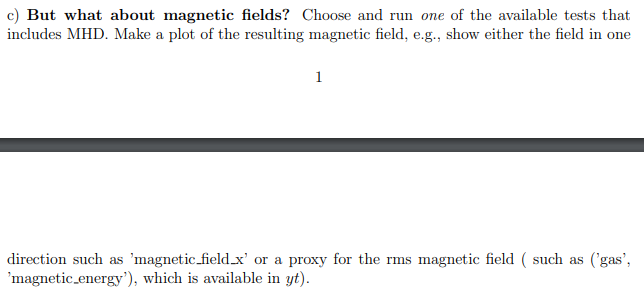

I chose the "mhd_blast.params" test. Per the documentation, this test is for a blastwave in a magnetized medium. This one was taking much longer, so I ran it on 32 cores to speed up the process. I have included a screenshot of the figure of slices given in Hopkins & Raives 2015 for this test. We will compare our results to this.
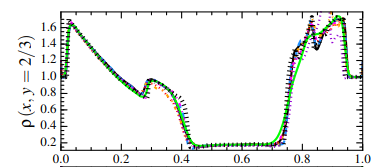

In [54]:
b0,b1,b5,b11 = "blastdata/snapshot_000.hdf5", "blastdata/snapshot_001.hdf5","blastdata/snapshot_005.hdf5", "blastdata/snapshot_011.hdf5"
blast0,blast1,blast5,blast11 = h5py.File(b0,'r'), h5py.File(b1,'r'), h5py.File(b5,'r'), h5py.File(b11,'r')

list(blast0["PartType0"].keys())

['Coordinates',
 'Density',
 'InternalEnergy',
 'MagneticField',
 'Masses',
 'ParticleChildIDsNumber',
 'ParticleIDGenerationNumber',
 'ParticleIDs',
 'SmoothingLength',
 'Velocities']

In [56]:
#First, I grab arrays for the positional coordinates. We pull out the x-values for plotting
b0 = blast0["PartType0"]["Coordinates"]
b11 = blast11["PartType0"]["Coordinates"]
b0_x = blast0["PartType0"]["Coordinates"][:,0]
b11_x = blast11["PartType0"]["Coordinates"][:,0]
#Next we grab the densities
b0_rho = blast0["PartType0"]["Density"][:]
b11_rho = blast11["PartType0"]["Density"][:]

In [57]:
#We find the index for the value of y closest to 2/3, so we can plot as Hopkins & Raives did
yslice0 = b0[:,1]
yslice0 = min(range(len(yslice0)), key=lambda i: abs(yslice0[i]-0.66))
print(yslice0)
yslice11 = b11[:,1]
yslice11 = min(range(len(yslice11)), key=lambda i: abs(yslice11[i]-0.66))
print(yslice11)

5066
29547


In [45]:
#Now we slice out the densities at this y-value
rhoslice0 = b0_rho[yslice0]
rhoslice11 = b11_rho[yslice11]
print(rhoslice0)

0.9981171275873316


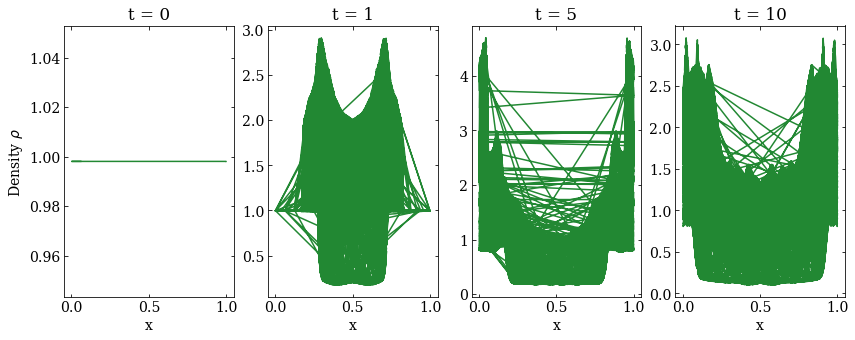

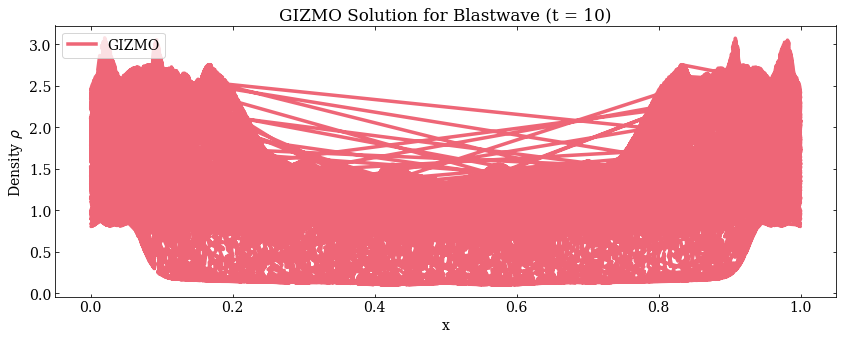

In [17]:
#Plotting time
plt.rc('font', family='serif',size=14);
fig, (ax1)=plt.subplots(1,1,figsize=(14, 5));
ax1.plot(b0_x,b0_rho,color=bright[2],label='t=0');
ax1.set_title('GIZMO Solution for Blastwave (t = 0)');
ax1.set_ylabel(r'Density $\rho(y = 2/3)$');
ax1.set_xlabel('x');
ax1.tick_params(which='both',axis='both',direction='in',top=True,right=True)
fig, (ax1)=plt.subplots(1,1,figsize=(14, 5));
ax1.plot(b11_x,b11_rho,color=bright[4],label='GIZMO',linewidth=3.5);
ax1.set_title('GIZMO Solution for Blastwave (t = 11)');
ax1.set_ylabel(r'Density $\rho(y = 2/3)$');
ax1.set_xlabel('x');
ax1.legend(loc="upper left")
ax1.tick_params(which='both',axis='both',direction='in',top=True,right=True)

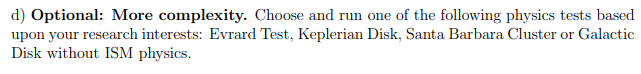

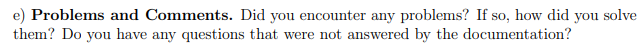

Thankfully, I had very little issues installing and GIZMO. It was a blessing after weeks of struggling with Hyperion. Most problems I encountered were just small syntax things I'd forgotten about pandas or matplotlib. Running the jobs on TACC was straight forward, thanks to your documentation and the GIZMO documentation.

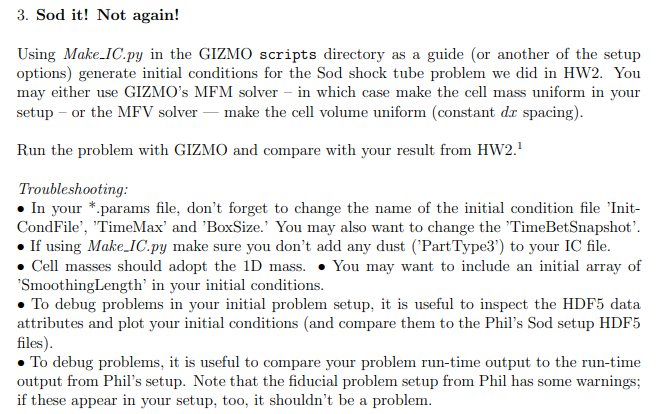